importing libraries and locating data table PATH

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
!cd ../../
!pwd


/Users/stephen/Flatiron/Phase2/Project2/notebooks/Stephen


In [2]:
df = pd.read_csv('/Users/stephen/Flatiron/Phase2/Project2/Data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


creating new dataframe with only my responsible columns

In [3]:
my_df = df[['price', 'condition', 'waterfront', 'zipcode', 'lat', 'long']]


In [4]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       21597 non-null  float64
 1   condition   21597 non-null  object 
 2   waterfront  19221 non-null  object 
 3   zipcode     21597 non-null  int64  
 4   lat         21597 non-null  float64
 5   long        21597 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1012.5+ KB


Checking Null values

In [5]:
my_df.isna().sum()

price            0
condition        0
waterfront    2376
zipcode          0
lat              0
long             0
dtype: int64

In [6]:
my_df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

replacing Null values withb 'N/A'

In [7]:
my_df['waterfront'] = my_df['waterfront'].fillna('N/A')

<ipython-input-7-490998c40b2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['waterfront'] = my_df['waterfront'].fillna('N/A')


In [8]:
my_df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [9]:
my_df['waterfront'].value_counts()

NO     19075
N/A     2376
YES      146
Name: waterfront, dtype: int64

In [31]:
my_df['price']

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

Plotting to see what the data looks like 


In [ ]:
fig, ax = plt.subplots()

x = my_df['price'].values
y = my_df['zipcode'].values
ax.set_xlabel('price')
ax.set_ylabel('zipcode')
ax.set_xticks(x)

plt.bar(x,y)

<BarContainer object of 21597 artists>

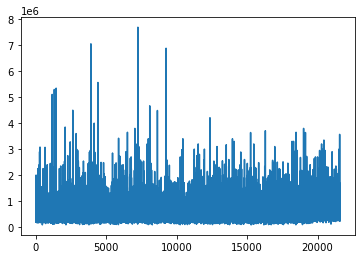

/Users/stephen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

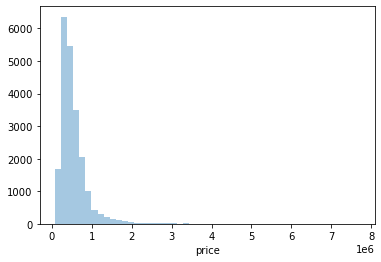

In [24]:
sns.distplot(a=my_df['price'], hist=True, kde=False, rug=False)

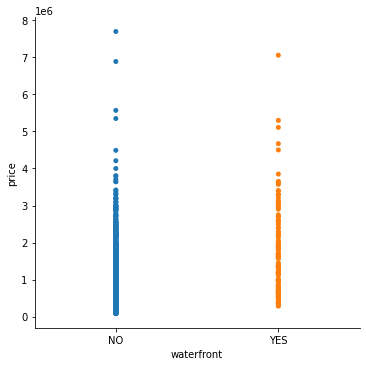

In [29]:
sns.catplot(x='waterfront',y='price',jitter = False, data=df)

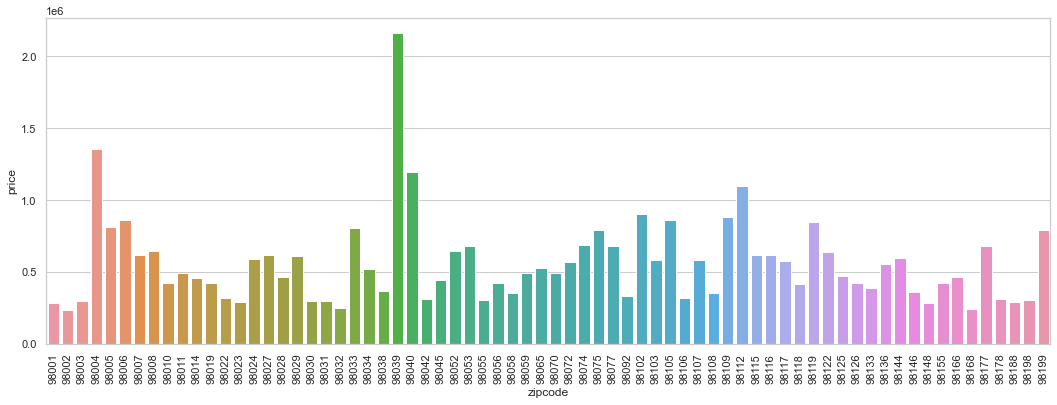

In [30]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(18,6))

sns.barplot(x='zipcode',y='price', ci = False, data=df)
plt.xticks(rotation=90);

In [37]:
my_df.groupby('zipcode')['price'].max()

zipcode
98001     850000.0
98002     389000.0
98003     950000.0
98004    7060000.0
98005    1960000.0
           ...    
98177    3800000.0
98178    1700000.0
98188     707000.0
98198    1350000.0
98199    3200000.0
Name: price, Length: 70, dtype: float64

In [ ]:
#sns.set(style='whitegrid')
#fig, ax = plt.subplots(figsize=(18,6))

#sns.barplot(x='condition',y='price', ci = False, data=df)
#plt.xticks(rotation=90);

In [ ]:
sns.scatterplot(x='condition',y='zipcode', hue='price', data=my_df)